<a href="https://colab.research.google.com/github/KimJisanER/KimJisan_TS/blob/main/_6_1_%EC%BC%80%EB%9D%BC%EC%8A%A4_CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스 CNN Fashion MNIST

#### module import

In [2]:
%load_ext tensorboard

In [3]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Input

### 데이터 로드 및 전처리

In [4]:
(x_train, y_train), (x_test, y_test) = load_data()

x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

x_train = x_train / 255.
x_test = x_test / 255.

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 모델 구성 및 컴파일
- 임의의 모델

In [6]:
def build_model():
  model = Sequential()

  input = Input(shape=(28,28,1))
  output = Conv2D(filters=32, kernel_size=(3,3))(input)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = Flatten()(output)
  output = Dense(units=128, activation='relu')(output)
  output = Dense(units=64, activation='relu')(output)
  output = Dense(units=10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])
  
  return model

model_1 = build_model()
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 128)               3965056   
                                                                 
 dense_1 (Dense)             (None, 64)                8256  

### 모델 학습
- 런타임 GPU로 설정

In [7]:
hist_1 = model_1.fit(x_train, y_train,
                     epochs=25,
                     validation_split=0.3,
                     batch_size=128)

Epoch 1/25
329/329 [==============================] - 15s 14ms/step - loss: 0.4893 - acc: 0.8267 - val_loss: 0.4133 - val_acc: 0.8522
Epoch 2/25
329/329 [==============================] - 5s 15ms/step - loss: 0.3379 - acc: 0.8770 - val_loss: 0.3533 - val_acc: 0.8709
Epoch 3/25
329/329 [==============================] - 4s 13ms/step - loss: 0.2829 - acc: 0.8961 - val_loss: 0.3496 - val_acc: 0.8769
Epoch 4/25
329/329 [==============================] - 5s 15ms/step - loss: 0.2387 - acc: 0.9112 - val_loss: 0.3835 - val_acc: 0.8715
Epoch 5/25
329/329 [==============================] - 4s 13ms/step - loss: 0.2005 - acc: 0.9262 - val_loss: 0.4093 - val_acc: 0.8695
Epoch 6/25
329/329 [==============================] - 4s 13ms/step - loss: 0.1732 - acc: 0.9371 - val_loss: 0.4285 - val_acc: 0.8722
Epoch 7/25
329/329 [==============================] - 5s 15ms/step - loss: 0.1491 - acc: 0.9447 - val_loss: 0.4970 - val_acc: 0.8599
Epoch 8/25
329/329 [==============================] - 4s 13ms/step -

### 학습 결과 시각화

In [8]:
hist_1.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

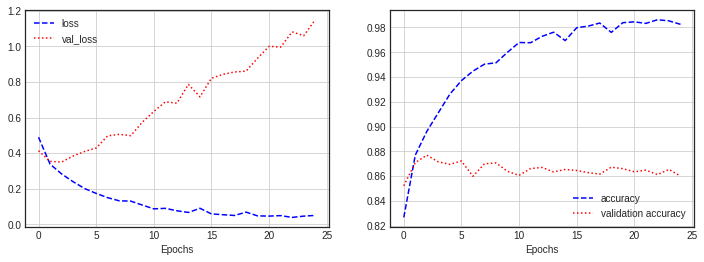

In [11]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(hist_1.history['loss'],'b--', label='loss')
plt.plot(hist_1.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_1.history['acc'], 'b--', label='accuracy')
plt.plot(hist_1.history['val_acc'], 'r:', label='validation accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

### 모델 평가

In [12]:
model_1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.2234 - acc: 0.8549


[1.223354697227478, 0.8549000024795532]

### 모델 재구성
- 학습 파라미터의 수 비교

In [13]:
def build_model2():
  model = Sequential()

  input = Input(shape=(28,28,1))
  output = Conv2D(filters=32, kernel_size=(3,3))(input)
  output = MaxPool2D(strides=(2,2))(output)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = MaxPool2D(strides=(2,2))(output)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = MaxPool2D(strides=(2,2))(output)
  output = Flatten()(output)
  output = Dense(units=128, activation='relu')(output)
  output = Dropout(0.3)(output)
  output = Dense(units=64, activation='relu')(output)
  output = Dropout(0.3)(output)
  output = Dense(units=10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])
  
  return model

model_2 = build_model2()
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          3692

### 모델 재학습

In [14]:
hist_2 = model_2.fit(x_train, y_train,
                     epochs=25,
                     validation_split=0.3,
                     batch_size=128)

Epoch 1/25
329/329 [==============================] - 3s 8ms/step - loss: 0.8967 - acc: 0.6762 - val_loss: 0.5629 - val_acc: 0.7939
Epoch 2/25
329/329 [==============================] - 2s 7ms/step - loss: 0.5745 - acc: 0.7940 - val_loss: 0.4710 - val_acc: 0.8277
Epoch 3/25
329/329 [==============================] - 2s 7ms/step - loss: 0.4960 - acc: 0.8231 - val_loss: 0.4321 - val_acc: 0.8383
Epoch 4/25
329/329 [==============================] - 2s 7ms/step - loss: 0.4458 - acc: 0.8401 - val_loss: 0.3980 - val_acc: 0.8527
Epoch 5/25
329/329 [==============================] - 2s 7ms/step - loss: 0.4074 - acc: 0.8549 - val_loss: 0.3995 - val_acc: 0.8543
Epoch 6/25
329/329 [==============================] - 2s 7ms/step - loss: 0.3838 - acc: 0.8627 - val_loss: 0.3577 - val_acc: 0.8694
Epoch 7/25
329/329 [==============================] - 2s 7ms/step - loss: 0.3595 - acc: 0.8709 - val_loss: 0.3567 - val_acc: 0.8714
Epoch 8/25
329/329 [==============================] - 2s 6ms/step - loss: 0.

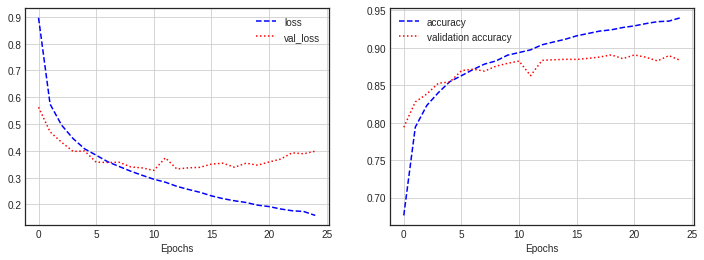

In [15]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(hist_2.history['loss'],'b--', label='loss')
plt.plot(hist_2.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_2.history['acc'], 'b--', label='accuracy')
plt.plot(hist_2.history['val_acc'], 'r:', label='validation accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

### 모델 재평가

In [16]:
model_2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4075 - acc: 0.8789


[0.4074546694755554, 0.8788999915122986]

## 모델 성능 높이기 - 많은 레이어 쌓기

In [19]:
from tensorflow.keras.layers import BatchNormalization, ReLU

In [21]:
def build_model3():
  model = Sequential()

  input = Input(shape=(28,28,1))
  output = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(input)
  output = Conv2D(filters=64, kernel_size=3, activation='relu', padding='valid')(output)
  output = MaxPool2D(strides=(2,2))(output)
  output = Dropout(0.5)(output)

  output =Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(output)
  output =Conv2D(filters=256, kernel_size=3, activation='relu', padding='valid')(output)
  output = MaxPool2D(strides=(2,2))(output)
  output = Dropout(0.5)(output)

  output = Flatten()(output)
  output = Dense(units=256, activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(units=100, activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(units=10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])
  
  return model

model_3 = build_model3()
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 13, 13, 128)       73856     
                                                           

## 모델 학습 및 결과 시각화

In [23]:
hist_3 = model_3.fit(x_train, y_train,
                     epochs=25,
                     validation_split=0.3,
                     batch_size=128)

Epoch 1/25
329/329 [==============================] - 8s 21ms/step - loss: 0.8444 - acc: 0.6971 - val_loss: 0.4169 - val_acc: 0.8456
Epoch 2/25
329/329 [==============================] - 7s 21ms/step - loss: 0.4773 - acc: 0.8332 - val_loss: 0.3720 - val_acc: 0.8597
Epoch 3/25
329/329 [==============================] - 7s 20ms/step - loss: 0.3893 - acc: 0.8647 - val_loss: 0.2891 - val_acc: 0.8924
Epoch 4/25
329/329 [==============================] - 7s 20ms/step - loss: 0.3481 - acc: 0.8771 - val_loss: 0.2709 - val_acc: 0.9013
Epoch 5/25
329/329 [==============================] - 7s 20ms/step - loss: 0.3263 - acc: 0.8859 - val_loss: 0.2700 - val_acc: 0.9032
Epoch 6/25
329/329 [==============================] - 7s 22ms/step - loss: 0.3060 - acc: 0.8911 - val_loss: 0.2588 - val_acc: 0.9093
Epoch 7/25
329/329 [==============================] - 7s 21ms/step - loss: 0.2898 - acc: 0.8990 - val_loss: 0.2433 - val_acc: 0.9115
Epoch 8/25
329/329 [==============================] - 7s 21ms/step - 

- 과적합은 되지 않았지만 층을 늘려도 좋은 성능을 낼 수 있음

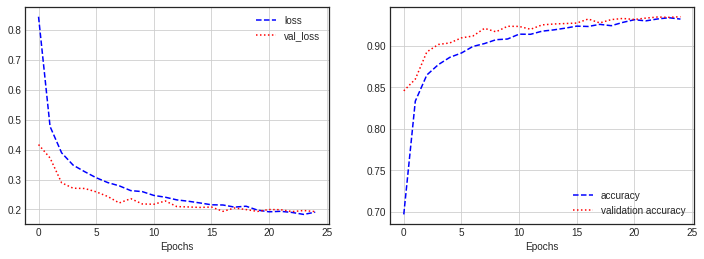

In [24]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(hist_3.history['loss'],'b--', label='loss')
plt.plot(hist_3.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_3.history['acc'], 'b--', label='accuracy')
plt.plot(hist_3.history['val_acc'], 'r:', label='validation accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [25]:
model_3.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2121 - acc: 0.9274


[0.21208302676677704, 0.9273999929428101]

## 모델 성능 높이기 - 이미지 보강(Image Augmentation)

- 주요 인자 참고: https://keras.io/ko/preprocessing/image/

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

In [30]:
augment_size=200

In [31]:
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28, 1)
(28, 28, 1)


In [32]:
x_augment = image_generator.flow(np.tile(x_train[0].reshape(28*28*1), augment_size).reshape(-1, 28, 28, 1),
                                 np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

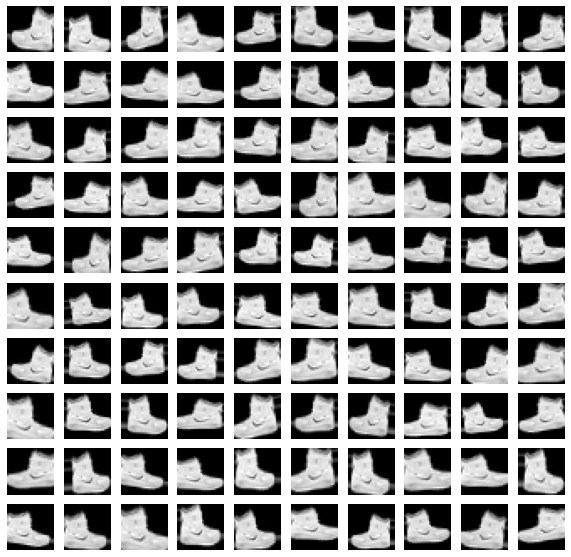

In [33]:
plt.figure(figsize=(10,10))
for i in range(1,101):
  plt.subplot(10,10,i)
  plt.axis('off')
  plt.imshow(x_augment[i-1].reshape(28,28), cmap='gray')

데이터 추가

In [34]:
image_generator = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.15,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

In [35]:
augment_size=30000

In [36]:
random_mask = np.random.randint(x_train.shape[0], size=augment_size)
x_augmented = x_train[random_mask].copy()
y_augmented = y_train[random_mask].copy()

In [37]:
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

x_train = np.concatenate((x_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))

print(x_train.shape)
print(y_train.shape)

(90000, 28, 28, 1)
(90000,)


## 모델 학습 및 결과 시각화

In [38]:
model_4= build_model3()
model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_15 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 128)       73856     
                                                           

In [39]:
hist_4 = model_4.fit(x_train, y_train,
                     epochs=25,
                     validation_split=0.3,
                     batch_size=128)

Epoch 1/25
493/493 [==============================] - 11s 21ms/step - loss: 0.7677 - acc: 0.7239 - val_loss: 0.9472 - val_acc: 0.6599
Epoch 2/25
493/493 [==============================] - 10s 20ms/step - loss: 0.4516 - acc: 0.8406 - val_loss: 0.7932 - val_acc: 0.7118
Epoch 3/25
493/493 [==============================] - 11s 22ms/step - loss: 0.3735 - acc: 0.8693 - val_loss: 0.6652 - val_acc: 0.7569
Epoch 4/25
493/493 [==============================] - 11s 22ms/step - loss: 0.3375 - acc: 0.8802 - val_loss: 0.5873 - val_acc: 0.7884
Epoch 5/25
493/493 [==============================] - 10s 20ms/step - loss: 0.3121 - acc: 0.8913 - val_loss: 0.5725 - val_acc: 0.7903
Epoch 6/25
493/493 [==============================] - 10s 20ms/step - loss: 0.2939 - acc: 0.8964 - val_loss: 0.5701 - val_acc: 0.7919
Epoch 7/25
493/493 [==============================] - 11s 23ms/step - loss: 0.2796 - acc: 0.9020 - val_loss: 0.5350 - val_acc: 0.8058
Epoch 8/25
493/493 [==============================] - 14s 28ms

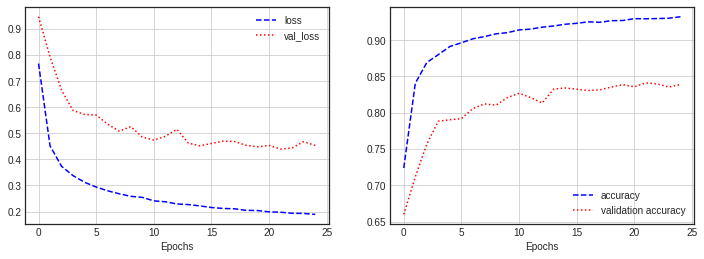

In [40]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(hist_4.history['loss'],'b--', label='loss')
plt.plot(hist_4.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_4.history['acc'], 'b--', label='accuracy')
plt.plot(hist_4.history['val_acc'], 'r:', label='validation accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

- 학습 인자를 이전과 다르게 주면서 학습하면 더 잘 나올것으로 판단

In [41]:
model_4.evaluate(x_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.2027 - acc: 0.9287


[0.20272506773471832, 0.9286999702453613]